# Field Visualization

In [1]:
import pyvista as pv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pv.global_theme.jupyter_backend = 'client'
# pv.start_xvfb()
pv.global_theme.jupyter_backend = 'static'

In [2]:
stl_filepath = '../../data/10_30.stl'
mesh = pv.read(stl_filepath)
mesh

PolyData,Information
N Cells,35750
N Points,17859
N Strips,0
X Bounds,"-3.881e+01, 6.821e+01"
Y Bounds,"-1.608e+02, 1.780e+01"
Z Bounds,"2.534e-01, 6.527e+01"
N Arrays,0


In [3]:
cell_key = 'fake_cell_values'
mesh.cell_data[cell_key] = np.arange(mesh.n_cells, dtype=float)

In [4]:
mesh.set_active_scalars(cell_key)

(<FieldAssociation.CELL: 1>,
 pyvista_ndarray([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 3.5747e+04,
                  3.5748e+04, 3.5749e+04], shape=(35750,)))

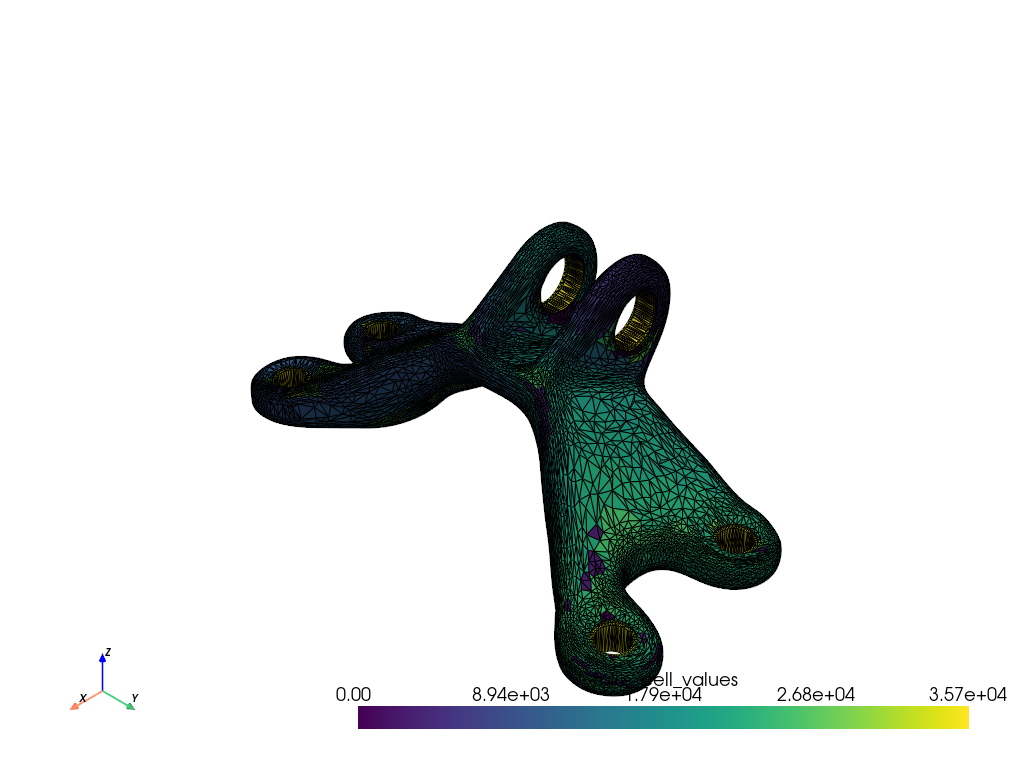

In [5]:
mesh.plot(show_edges=True)

In [6]:
df = pd.DataFrame({cell_key: mesh.cell_data[cell_key]})
df.describe()

,fake_cell_values
count,35750.000000
mean,17874.500000
std,10320.280398
min,0.000000
25%,8937.250000
50%,17874.500000
75%,26811.750000
max,35749.000000


# Filters
 - PolyData class provides various filters like threshold, elevate, clip, etc.

## Clip / Slice
 - clip(): 지정한 평면(또는 평면 리스트)에 따라 Geometry 를 잘라냄
 - slice(): 지정한 평면에 따라 PolyData를 잘라 단면(슬라이스)를 추출
 - slice_along_axis(), slice_along_line(), slice_orthogonal() 등: 축이나 라인을 따라 연속으로 슬라이스 추출

## geometry 변환
 - triangulate(): Polygon 형태의 셀을 삼각형으로 분할
 - clean(): 중복된 점 혹은 불필요한 셀 제거(VTK의 vtkCleanPolyData 대응)
 - connectivity(): 연결 요소 식별, 라벨(connected region ID)를 매긴 새로운 스칼라 데이터 생성

## 추출 / 통계
 - extract_largest(): 연결 요소 중 가장 큰 파트를 추출
 - extract_feature_edges(): 크리스 엣지(crease edges), 경계 엣지(boundary edges) 등 분리해서 추출
 - extract_selection(): 셀 혹은 점(point)에 대한 마스크나 셀 ID 등을 기준으로 영역을 추출
 - elevation(): Z축(혹은 지정 축)에 따른 스칼라 값을 부여, 컬러 매핑 등에 활용

## 표면 재처리 / 변환
 - decimate(): Mesh 수를 줄여서 간소화(simplify) (VTK decimation 알고리즘 사용)
 - smooth(): 표면을 부드럽게 만듦(라플라시안 스무딩 등)
 - reflect(): 지정 평면을 기준으로 geometry 반사
 - rotate_x(), rotate_y(), rotate_z(): 각 축을 중심으로 메시 회전
 - flip_x(), flip_y(), flip_z(): 각 축에 대해 좌우 반전

## 부피 확장 / Sweep
 - extrude(): 주어진 방향(벡터)으로 PolyData(2D 단면 등)를 늘여 3차원 형상 생성
 - extrude_rotate(): 회전(sweep)을 적용하여 회전체(회전판) 같은 3차원 형상 생성
 - revolve(): 지정 축 또는 곡선을 따라 회전/접합하여 3차원 형상 생성

## 곡률, 노멀 등 계산
 - curvature(): 곡률 계산하여 스칼라 필드로 지정
 - compute_normals(): 표면 노멀 다시 계산, PolyData에 노멀 벡터 저장
 - plot_curvature(): 메시 곡률 계산하여 간단히 시각화(내부에서 curvature() 활용)

## 기타
 - boolean_add(), boolean_cut(), boolean_intersection(): boolean 연산을 통해 두 PolyData 간 합집합/차집합/교집합 등 계산
 - merge(): 여러 PolyData를 하나로 병합
 - delaunay_2d(): 2D 점 집합에 대한 Delaunay 삼각 분할 실행하여 PolyData 생성
 - project_points_to_plane(): 포인트들을 특정 평면에 투영(projection)
 - cell_data_to_point_data(), point_data_to_cell_data(): 셀/포인트 간 데이터(스칼라, 벡터 등) 변환

In [7]:
threshed = mesh.threshold([17874-4000, 17874+4000])
threshed

UnstructuredGrid (0x72f9eb29df00)
  N Cells:    8001
  N Points:   4783
  X Bounds:   -3.788e+01, 6.707e+01
  Y Bounds:   -1.267e+02, 1.780e+01
  Z Bounds:   2.677e-01, 6.492e+01
  N Arrays:   1

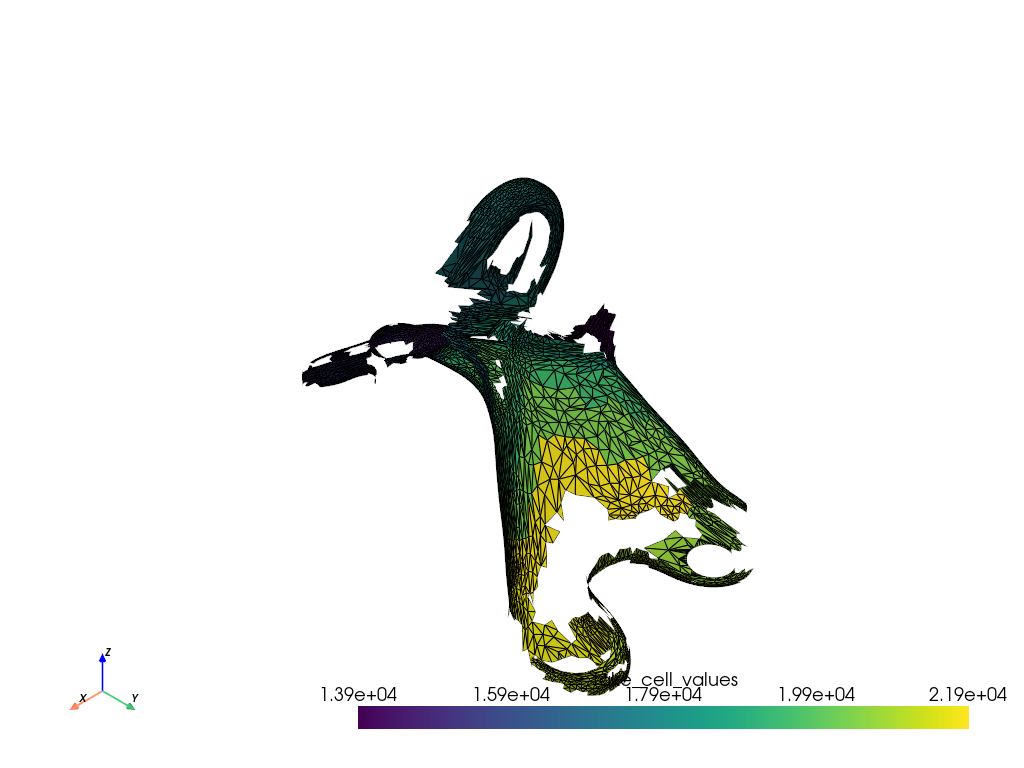

In [8]:
threshed.plot(scalars=cell_key, show_edges=True)

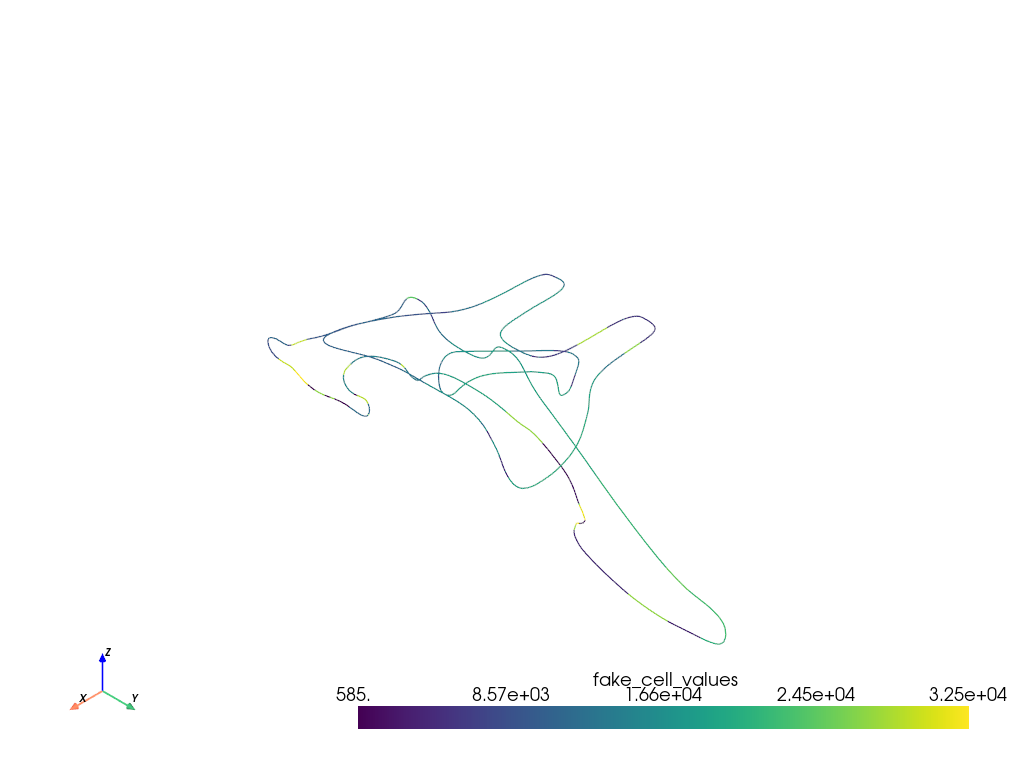

In [9]:
slices = mesh.slice_orthogonal()
slices.plot()

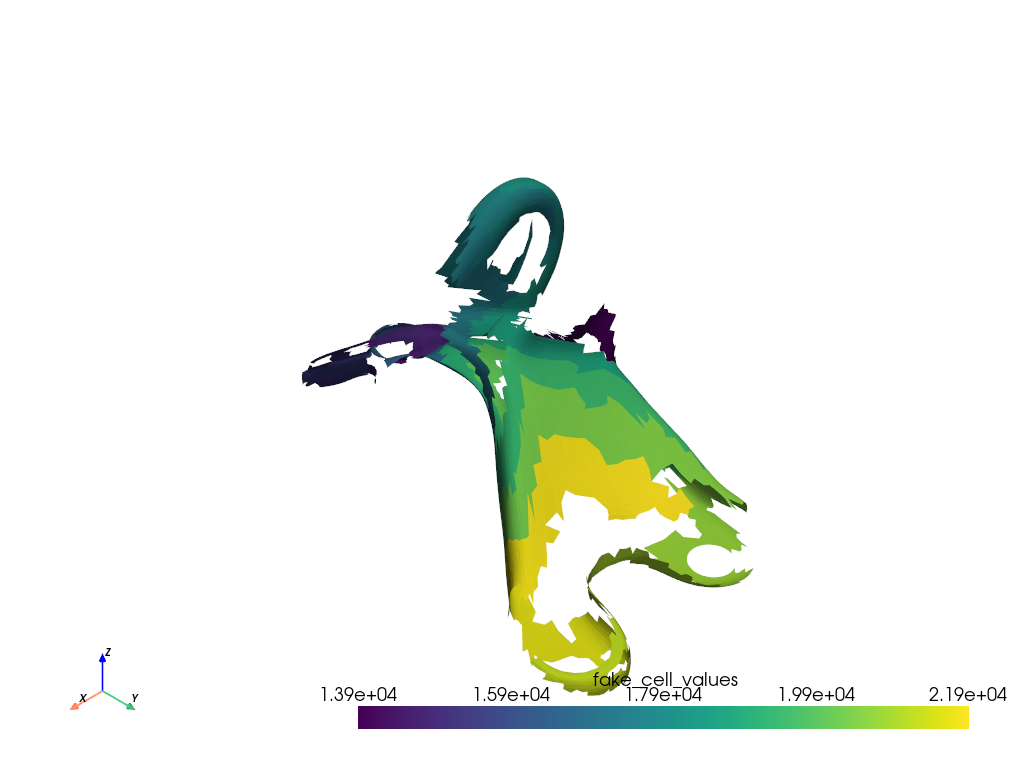

In [10]:
result = threshed.elevation() #.clip(normal='z').slice_orthogonal()
result.plot()